In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')

In [2]:
#getting the movies metadata dataset.
df = pd.read_csv(r"movies_metadata.csv")

In [3]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
# getting the relevant columns of the dataset.
df_t=df[["id","title","original_title","genres","runtime","original_language","overview","tagline","vote_count","vote_average","adult"]]

In [5]:
#Ensuring each cell in "genres" column is converted to an actual list
df_t['genres'] = df_t['genres'].apply(literal_eval)

#Extracting the different ("name" key) genres for each row for the genres column
df_t['genres'] = df_t['genres'].apply(lambda row: [elem['name'] for elem in row] if isinstance(row, list) else [])

In [6]:
df_t["genres"].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [7]:
df_t.columns

Index(['id', 'title', 'original_title', 'genres', 'runtime',
       'original_language', 'overview', 'tagline', 'vote_count',
       'vote_average', 'adult'],
      dtype='object')

In [8]:
##all the columns and the number of rows that is null in these columns.
df_t.isnull().sum()

id                       0
title                    6
original_title           0
genres                   0
runtime                263
original_language       11
overview               954
tagline              25054
vote_count               6
vote_average             6
adult                    0
dtype: int64

<Axes: xlabel='runtime'>

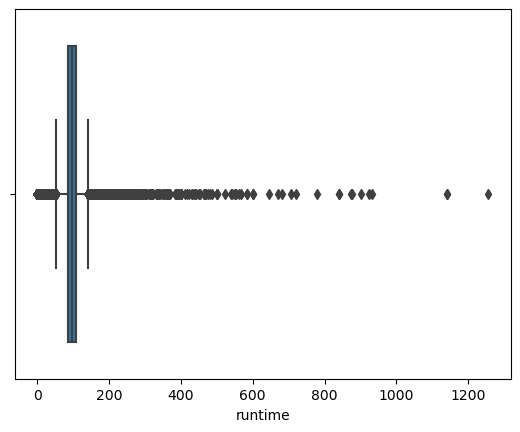

In [9]:
#viewing distribution of data
sns.boxplot(x=df['runtime'])

In [10]:
df_t["runtime"].fillna(np.nan,inplace=True)
q1=df_t["runtime"].quantile(0.25)
q3=df_t["runtime"].quantile(0.75)
iqr=q3-q1
#Defining lower and upper bounds using quantiles to deal with outliers.
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

#Replacing outliers with np.nan
df_t["runtime"]=df_t["runtime"].apply(lambda x:np.nan if (x>upper_bound or x<lower_bound) else x)

#Replacing np.nan with dataframes median.
df_t["runtime"].fillna(df_t["runtime"].median(),inplace=True)

<Axes: xlabel='runtime'>

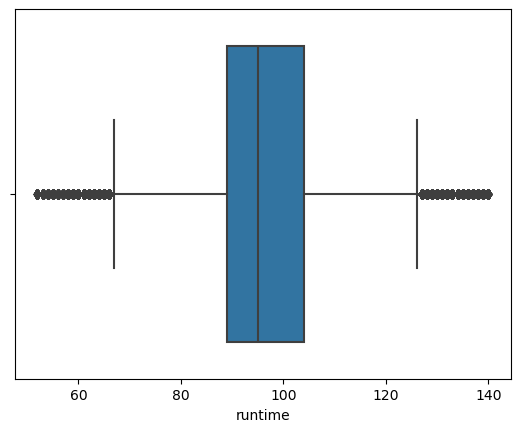

In [11]:
#Cleaned version of the column "runtime"
sns.boxplot(x=df_t['runtime'])

<Axes: xlabel='runtime', ylabel='Density'>

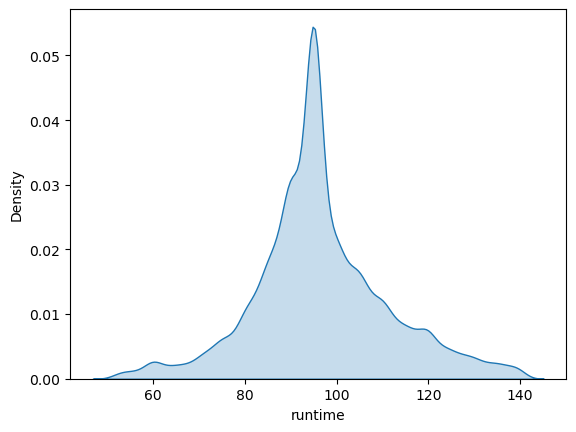

In [12]:
#Another plot representation of the "runtime" to viewing the distribution of the data
sns.kdeplot(df_t['runtime'],shade=True)

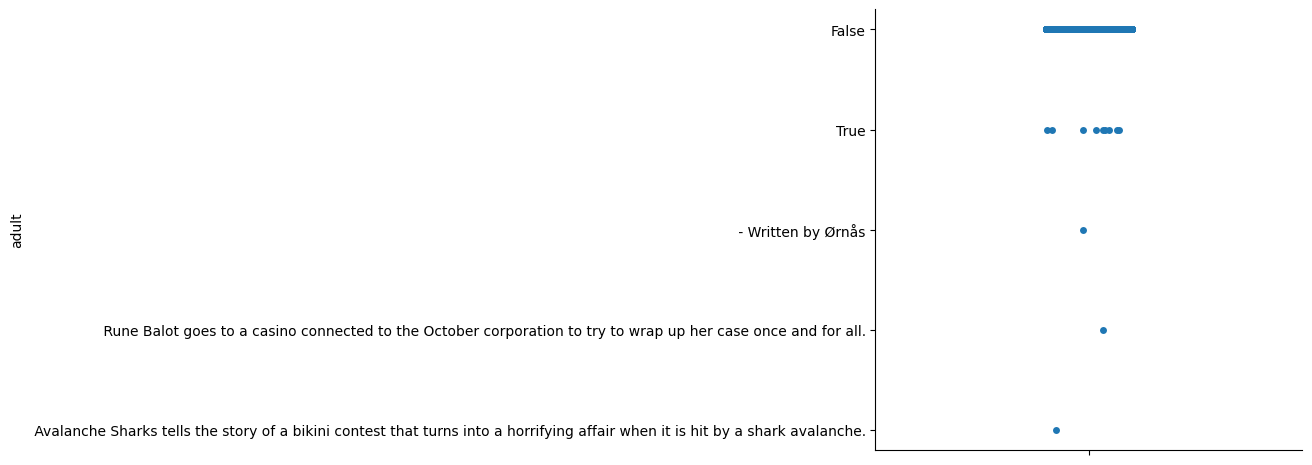

In [13]:
#As there are no null values, viewing the data using plot to see different answers. If there are no relevant answers replacing them with np.nan
sns.catplot(data=df_t['adult'])
df_t["adult"]=df_t["adult"].apply(lambda x:x if x=="False" or x=="True" else np.nan)

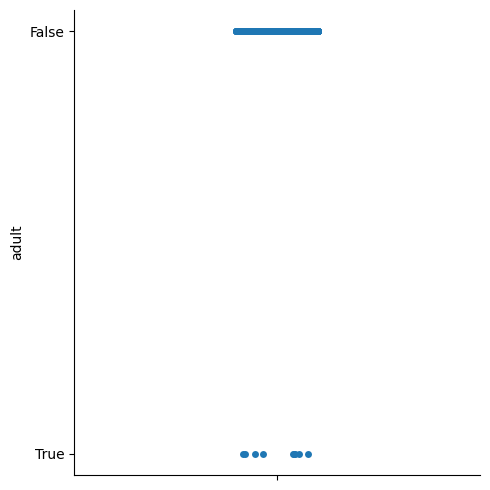

In [14]:
#Analysing the distribution, "false" is majority.
sns.catplot(data=df_t['adult'])

In [15]:
#As there isn't a lot of irrelevant answers, replacing np.nan values with the majority answer ("False") 
df_t["adult"].fillna("False",inplace=True)

In [16]:
#Dropping the np.nan values.
df_t["title"].dropna(inplace=True)

In [17]:
df_t.head(50)

,id,title,original_title,genres,runtime,original_language,overview,tagline,vote_count,vote_average,adult
0,862,Toy Story,Toy Story,"[Animation, Comedy, Family]",81.0,en,"Led by Woody, Andy's toys live happily in his ...",NaN,5415.0,7.7,False
1,8844,Jumanji,Jumanji,"[Adventure, Fantasy, Family]",104.0,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,2413.0,6.9,False
2,15602,Grumpier Old Men,Grumpier Old Men,"[Romance, Comedy]",101.0,en,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,92.0,6.5,False
3,31357,Waiting to Exhale,Waiting to Exhale,"[Comedy, Drama, Romance]",127.0,en,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,34.0,6.1,False
4,11862,Father of the Bride Part II,Father of the Bride Part II,[Comedy],106.0,en,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,173.0,5.7,False
5,949,Heat,Heat,"[Action, Crime, Drama, Thriller]",95.0,en,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,1886.0,7.7,False
6,11860,Sabrina,Sabrina,"[Comedy, Romance]",127.0,en,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,141.0,6.2,False
7,45325,Tom and Huck,Tom and Huck,"[Action, Adventure, Drama, Family]",97.0,en,"A mischievous young boy, Tom Sawyer, witnesses...",The Original Bad Boys.,45.0,5.4,False
8,9091,Sudden Death,Sudden Death,"[Action, Adventure, Thriller]",106.0,en,International action superstar Jean Claude Van...,Terror goes into overtime.,174.0,5.5,False
9,710,GoldenEye,GoldenEye,"[Adventure, Action, Thriller]",130.0,en,James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,1194.0,6.6,False


In [18]:
#Replacing np.nan values with median
df_t["vote_count"].fillna(df_t["vote_count"].median(),inplace=True)
df_t["vote_average"].fillna(df_t["vote_average"].median(),inplace=True)

In [19]:
#As i will use cosine similarity, i replaced all the null values with empty string.
df_t.fillna('')

,id,title,original_title,genres,runtime,original_language,overview,tagline,vote_count,vote_average,adult
0,862,Toy Story,Toy Story,"[Animation, Comedy, Family]",81.0,en,"Led by Woody, Andy's toys live happily in his ...",,5415.0,7.7,False
1,8844,Jumanji,Jumanji,"[Adventure, Fantasy, Family]",104.0,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,2413.0,6.9,False
2,15602,Grumpier Old Men,Grumpier Old Men,"[Romance, Comedy]",101.0,en,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,92.0,6.5,False
3,31357,Waiting to Exhale,Waiting to Exhale,"[Comedy, Drama, Romance]",127.0,en,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,34.0,6.1,False
4,11862,Father of the Bride Part II,Father of the Bride Part II,[Comedy],106.0,en,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,173.0,5.7,False
...,...,...,...,...,...,...,...,...,...,...,...
45461,439050,Subdue,رگ خواب,"[Drama, Family]",90.0,fa,Rising and falling between a man and woman.,Rising and falling between a man and woman,1.0,4.0,False
45462,111109,Century of Birthing,Siglo ng Pagluluwal,[Drama],95.0,tl,An artist struggles to finish his work while a...,,3.0,9.0,False
45463,67758,Betrayal,Betrayal,"[Action, Drama, Thriller]",90.0,en,"When one of her hits goes wrong, a professiona...",A deadly game of wits.,6.0,3.8,False
45464,227506,Satan Triumphant,Satana likuyushchiy,[],87.0,en,"In a small town live two brothers, one a minis...",,0.0,0.0,False


In [20]:
#If genres are in a list, extracting them to a single string
df_t['genres'] = df_t['genres'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
#converting titles to lowercase.
df_t["title"] = df_t["title"].str.lower()  # Convert titles to lowercase

In [21]:
df_t["genres"]

0         Animation Comedy Family
1        Adventure Fantasy Family
2                  Romance Comedy
3            Comedy Drama Romance
4                          Comedy
                   ...           
45461                Drama Family
45462                       Drama
45463       Action Drama Thriller
45464                            
45465                            
Name: genres, Length: 45466, dtype: object

In [27]:
#describe including Object type values
print(df_t["overview"].describe(include=["O"]))
#replacing top value, No overview found with np.nan and replacing it with empty string
df_t["overview"].replace("No overview found.",np.nan)
df_t.fillna("",inplace=True)

count     45466
unique    44308
top            
freq        954
Name: overview, dtype: object


In [31]:
#describe including Object type values
df_t["original_language"].describe(include=["O"])

count     45466
unique       93
top          en
freq      32269
Name: original_language, dtype: object

In [32]:
#sum of null values
df_t["tagline"].isnull().sum()

0

In [34]:
df_t["tagline"].describe(include=["O"])
df_t["tagline"].fillna("",inplace=True)

In [27]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import linear_kernel

#to combine features, making sure that all the datatypes of the columns are string
df_t=df_t.astype(str)
#combining features into a single row (Content-based filtering)
def combine_features(row):
    try:
        # Combine columns into a single string
        combined = f"{row['title']} {row['genres']} {row['runtime']} {row['original_language']} {row['overview']} {row['tagline']} {row['vote_count']} {row['vote_average']} {row['adult']}"
        return combined
    except Exception as e:
        #if any error encountered, returning an empty string
        print(f"Error combining features: {e}")
        return ""
#applying combine_features function to all the columns
df_t['combined_features'] = df_t.apply(combine_features, axis=1)
#making sure there are no null values in dataframe
df_t['combined_features'] = df_t['combined_features'].fillna('')

# Initialize the HashingVectorizer and TfidfTransformer
vectorizer = HashingVectorizer(stop_words='english', n_features=2**18, alternate_sign=False)
tfidf_transformer = TfidfTransformer()

# Combine HashingVectorizer and TfidfTransformer into a pipeline
pipeline = make_pipeline(vectorizer, tfidf_transformer)

# Transform the combined_features to a matrix
tfidf_matrix = pipeline.fit_transform(df_t['combined_features'])

# Function to get recommendations
def get_recommendations(title, num_recommendations=10):
    if title not in df_t['title'].values:
        print(f"Warning: Title '{title}' not found in dataset.")
        return []
    
    # Get the index of the movie that matches the title
    idx = df_t.index[df_t['title'] == title].tolist()[0]
    
    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix[idx:idx+1], tfidf_matrix)
    
    # Get the scores of all movies
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return df_t.iloc[movie_indices][['title', 'overview', 'genres']]

In [28]:
if __name__ == "__main__":
    recommendations = get_recommendations("fight club",10)
    print(recommendations)
    #print(recommendations["title"])
    #print(recommendations["overview"])
    #print(recommendations["genres"])

                       title  \
35491             soap opera   
5203               delirious   
20043  poor little rich girl   
3962            the big town   
24600              cleopatra   
29963                suzanne   
9256             the quickie   
15909                leaving   
22106                 zero 2   
18348            local color   

                                                overview  \
35491                                                nan   
5203   A soap opera writer gets hit on the head and w...   
20043  Cossetted and bored, Barbara Barry is finally ...   
3962   It is 1957. J.C. Cullen is a young man from a ...   
24600  A retired teacher and a soap star leave their ...   
29963  The story of a destiny. Suzanne's and her fami...   
9256   A crime soap opera about a Russian mobster ret...   
15909  Suzanne is a well to do married woman and moth...   
22106  What would you get if you mix a gangster film ...   
18348  Mark Rappaport's off center soap opera p